In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing = datasets.load_boston()

housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

## 선형 회귀

In [3]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [5]:
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Target  
0       15.3  396.90   4.98  

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

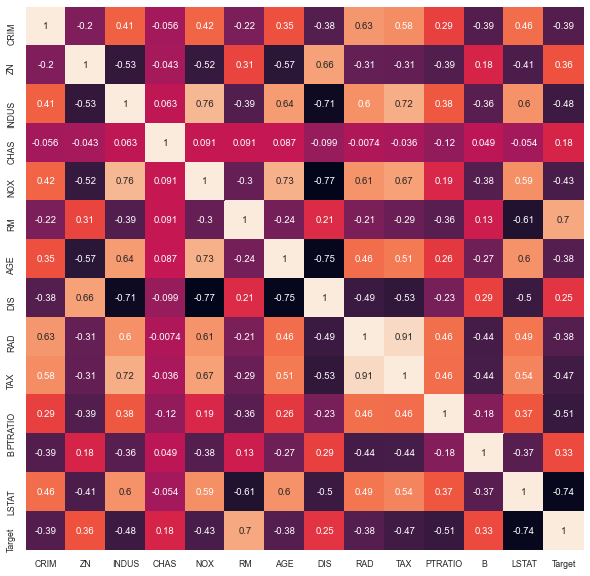

In [10]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [12]:
corr_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [13]:
plot_cols=['Target', 'LSTAT', 'RM','PTRATIO','INDUS']
plot_df=df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


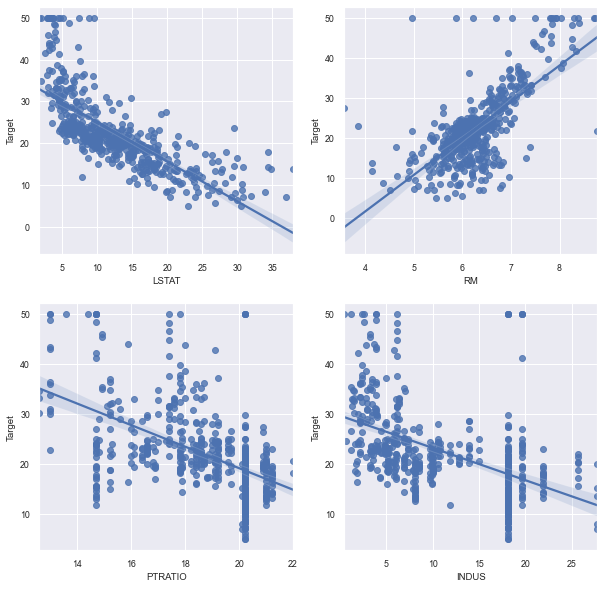

In [15]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    ax1=plt.subplot(2,2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled= df.iloc[:, :-1] # 마지막 열 제외
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

df.iloc[:,:-1] = df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [17]:
from sklearn.model_selection import train_test_split
x_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:, "Target"]
x_train , x_test , y_train, y_test = train_test_split(x_data,y_data,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print('회귀계수 기울기:', np.round(lr.coef_, 1))
print('상수항(절편):', np.round(lr.intercept_, 1))

회귀계수 기울기: [-23.2  25.4]
상수항(절편): 16.3


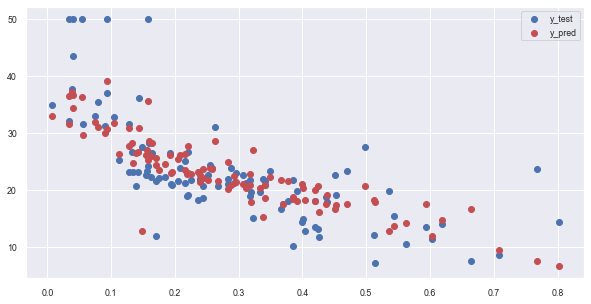

In [19]:
y_test_pred = lr.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test['LSTAT'], y_test, label='y_test')
plt.scatter(x_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE:%.4f' %train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:%.4f' %test_mse)

Train MSE:30.8042
Test MSE:29.5065


## 로버스트 회귀

In [32]:
df = pd.read_csv("C:\pt\data\housing.data.txt", header=None, sep='\s+')
df.columns = ["CRIM", 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


기울기: 9.102
절편: -35


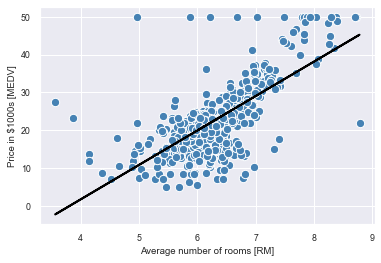

In [31]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression(fit_intercept=True)
X = df[['RM']].values
y = df['MEDV'].values
slr.fit(X,y)
print('기울기: %.3f' % slr.coef_[0])
print('절편: %.f' % slr.intercept_)

plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
plt.plot(X, slr.predict(X), color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

In [35]:
# RANSAC
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        residual_threshold=5.0,
                        random_state=0)

ransac.fit(X,y)

inlier_mask = ransac.inlier_mask_

outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3,10,1)

line_y_ransac = ransac.predict(line_X[:, np.newaxis])

기울기: 10.735
절편 : -44.089


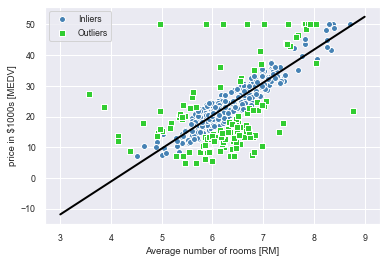

In [38]:
# 실제 데이터
plt.scatter(X[inlier_mask], y[inlier_mask],
           c='steelblue', edgecolor='white',
           marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
           c='limegreen', edgecolors='white',
           marker='s', label='Outliers')

#예측 모델 선그래프
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('price in $1000s [MEDV]')
plt.legend(loc='upper left')

print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편 : %.3f' %ransac.estimator_.intercept_)
plt.show()

## 로지스틱 회귀

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

압축 전의 shape 
 (569, 30)
압축 후의 shape 
 (569, 1)


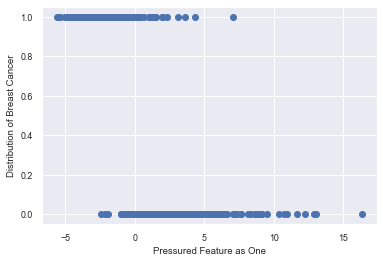

In [40]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
print('압축 전의 shape \n', data_scaled.shape)

#압축
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)
print('압축 후의 shape \n', pca_data.shape)

#시각화
plt.scatter(pca_data, cancer.target)
plt.xlabel('Pressured Feature as One')
plt.ylabel('Distribution of Breast Cancer')
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(pca_data,
                                                   cancer.target,
                                                   test_size=0.3,
                                                   random_state=0)

#모델 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#모델이 예측한 확률값
lr_proba = lr_clf.predict_proba(X_test)

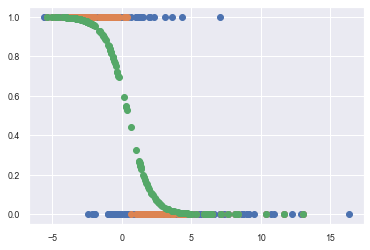

accuracy: 0.895
roc_auc: 0.890


In [46]:
plt.scatter(pca_data, cancer.target)

# 로지스틱 모형이 분류한 값 주황
plt.scatter(X_test, lr_preds)

# 예측한 확률 초록
plt.scatter(X_test, lr_proba[:,1])

plt.show()

from sklearn.metrics import accuracy_score, roc_auc_score

print('accuracy: {:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [3]:
model = Sequential()

model.add(Dense(input_dim=1, units = 1)) # 입력 1, 출력 1

model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'sgd', metrics=['binary_accuracy']) #크로스 엔트로피=비용함수, 경사하강법 학습

In [4]:
x = np.array([-2,-1.5,-1,1.25,1.62,2])
y = np.array([0,0,0,1,1,1])

In [5]:
model.fit(x,y,epochs=300, verbose=0)

In [6]:
model.predict([-2,-1.5,-1,1.25,1.62,2])

array([[0.06675559],
       [0.12084466],
       [0.20894727],
       [0.83313274],
       [0.8900589 ],
       [0.9300693 ]], dtype=float32)

In [7]:
model.predict([-1000,1000])

array([[0.],
       [1.]], dtype=float32)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers[0].weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.3063456]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.02493712], dtype=float32)>]

In [10]:
model.layers[0].get_weights()

[array([[1.3063456]], dtype=float32), array([-0.02493712], dtype=float32)]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 214s 19us/step


In [13]:
print('train data(count, row, column) : '+ str(x_train.shape))
print('test data(count, row, column) : '+ str(x_test.shape))

train data(count, row, column) : (60000, 28, 28)
test data(count, row, column) : (10000, 28, 28)


In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [15]:
print('train target (count):' + str(y_train.shape)) 
print('test target (count):' + str(y_test.shape))

train target (count):(60000,)
test target (count):(10000,)


In [16]:
print('sample from train:' + str(y_train[0]))
print('sample from test:' + str(y_test[0]))

sample from train:5
sample from test:7


In [17]:
input_dim = 784
x_train = x_train.reshape(60000, input_dim)
x_test= x_test.reshape(10000, input_dim)

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [19]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [20]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [21]:
model = Sequential()
model.add(Dense(input_dim = input_dim, units=10, activation='softmax'))

In [22]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=2048, epochs=100, verbose=0)

In [23]:
model.predict(x_train)[0]

array([2.3364587e-02, 1.2511273e-03, 1.5531034e-02, 4.2379653e-01,
       2.9847104e-04, 4.7533816e-01, 8.1015974e-03, 2.7449772e-02,
       1.7385541e-02, 7.4832407e-03], dtype=float32)

In [25]:
score = model.evaluate(x_test, y_test)
print('test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.4216 - accuracy: 0.8898
test accuracy: 0.8898000121116638


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.07132953, -0.08437996,  0.08179151, ...,  0.0026362 ,
         -0.08163758, -0.03157253],
        [ 0.06565303, -0.05487805,  0.07305928, ..., -0.07355037,
         -0.05526334,  0.05757227],
        [-0.0780062 , -0.07615456,  0.03394382, ..., -0.01731449,
          0.00182254,  0.02149593],
        ...,
        [-0.01030605, -0.00928373,  0.05072904, ..., -0.02738084,
          0.05054789, -0.08555168],
        [-0.01829775,  0.07844859, -0.05472926, ..., -0.08605336,
         -0.02820686,  0.05894499],
        [-0.07693241, -0.08163646, -0.02914568, ...,  0.05984835,
          0.06316017, -0.02218056]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.07081681,  0.15578257, -0.0330761 , -0.06464222,  0.0605341 ,
         0.17459702, -0.02457971,  0.10364637, -0.26066825, -0.04077696],
       dtype=float32)>]

## 규제화

In [30]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import pandas as pd

In [32]:
boston = load_boston()

x= pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [34]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
x_train=x_train_scaled
x_test=x_test_scaled

In [36]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression(n_jobs=-1)
model_LR.fit(x_train, y_train)
pd.DataFrame(model_LR.coef_, index=x.columns, columns = ['Linear regression 계수'])

,Linear regression 계수
CRIM,-0.838843
ZN,1.428401
INDUS,0.405327
CHAS,0.679425
NOX,-2.530391
RM,1.933816
AGE,0.100907
DIS,-3.236154
RAD,2.703183
TAX,-1.917299


In [39]:
import matplotlib.pyplot as plt
model_Ridge1 = Ridge(alpha=0.01, random_state=1)
model_Ridge2 = Ridge(alpha=1, random_state=1)
model_Lasso1 = Lasso(alpha=0.01, random_state=1)
model_Lasso2 = Lasso(alpha=1, random_state=1)

model_Ridge1.fit(x_train, y_train)
model_Ridge2.fit(x_train, y_train)
model_Lasso1.fit(x_train, y_train)
model_Lasso2.fit(x_train, y_train)

Lasso(alpha=1, random_state=1)

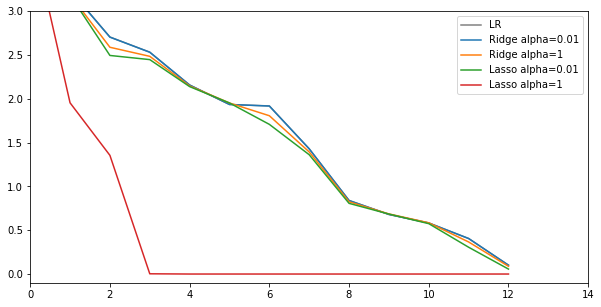

In [40]:
plt.figure(figsize=(10,5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label='LR', c='gray')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label='Ridge alpha=0.01')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label='Ridge alpha=1')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label='Lasso alpha=0.01')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label='Lasso alpha=1')

plt.legend()
plt.ylim((-0.1, 3))
plt.xlim((0,14))
plt.show()

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [45]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target']= cancer.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [46]:
from sklearn.model_selection import train_test_split
x, y = df.iloc[:,:30].values, df.iloc[:,30].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify=y)

In [50]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.fit_transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression
lr2_10 = LogisticRegression(penalty='l2', C=10.0)
lr2_1 = LogisticRegression(penalty='l2', C=1.0)
lr2_0_1 = LogisticRegression(penalty='l2', C=0.1)
lr1_10 = LogisticRegression(penalty='l1', C=10.0, solver='liblinear')
lr1_1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lr1_0_1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

In [54]:
lr2_10.fit(x_train_std, y_train)
print('train accuracy L2, 0.1:', lr2_10.score(x_train_std,y_train))
print('test accuracy L2, 0.1:', lr2_10.score(x_test_std,y_test))
print('\n')

lr2_1.fit(x_train_std, y_train)
print('train accuracy L2, 1:', lr2_1.score(x_train_std,y_train))
print('test accuracy L2, 1:', lr2_1.score(x_test_std,y_test))
print('\n')

lr2_0_1.fit(x_train_std, y_train)
print('train accuracy L2, 10:', lr2_0_1.score(x_train_std,y_train))
print('test accuracy L2, 10:', lr2_0_1.score(x_test_std,y_test))
print('\n')

lr1_10.fit(x_train_std, y_train)
print('train accuracy L1, 0.1:', lr1_10.score(x_train_std,y_train))
print('test accuracy L1, 0.1:', lr1_10.score(x_test_std,y_test))
print('\n')

lr1_1.fit(x_train_std, y_train)
print('train accuracy L1, 1:', lr1_1.score(x_train_std,y_train))
print('test accuracy L1, 1:', lr1_1.score(x_test_std,y_test))
print('\n')

lr1_0_1.fit(x_train_std, y_train)
print('train accuracy L1, 10:', lr1_0_1.score(x_train_std,y_train))
print('test accuracy L1, 10:', lr1_0_1.score(x_test_std,y_test))
print('\n')

train accuracy L2, 0.1: 0.9949748743718593
test accuracy L2, 0.1: 0.9707602339181286


train accuracy L2, 1: 0.992462311557789
test accuracy L2, 1: 0.9707602339181286


train accuracy L2, 10: 0.9849246231155779
test accuracy L2, 10: 0.9649122807017544


train accuracy L1, 0.1: 0.992462311557789
test accuracy L1, 0.1: 0.9707602339181286


train accuracy L1, 1: 0.9899497487437185
test accuracy L1, 1: 0.9707602339181286


train accuracy L1, 10: 0.9824120603015075
test accuracy L1, 10: 0.9649122807017544




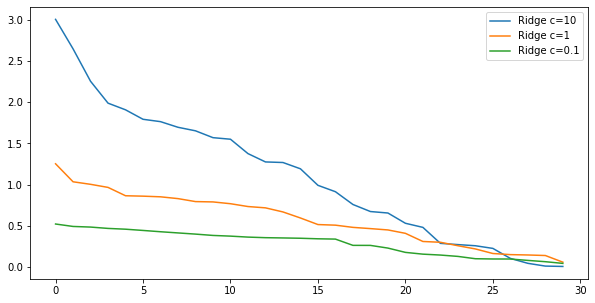

In [56]:
plt.figure(figsize=(10,5))

plt.plot(sorted(np.abs(lr2_10.coef_)[0])[::-1], label='Ridge c=10')
plt.plot(sorted(np.abs(lr2_1.coef_)[0])[::-1], label='Ridge c=1')
plt.plot(sorted(np.abs(lr2_0_1.coef_)[0])[::-1], label='Ridge c=0.1')
plt.legend()
plt.show()

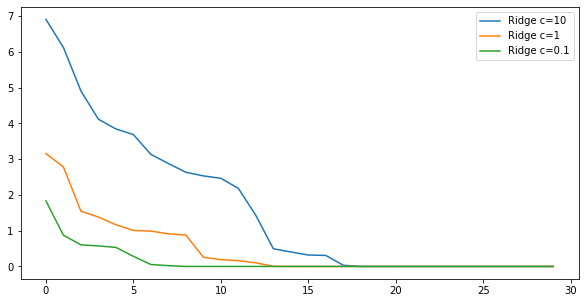

In [57]:
plt.figure(figsize=(10,5))

plt.plot(sorted(np.abs(lr1_10.coef_)[0])[::-1], label='Ridge c=10')
plt.plot(sorted(np.abs(lr1_1.coef_)[0])[::-1], label='Ridge c=1')
plt.plot(sorted(np.abs(lr1_0_1.coef_)[0])[::-1], label='Ridge c=0.1')
plt.legend()
plt.show()